In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import contourpy
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import FormatStrFormatter
import numpy as np
from _FigureJiazeHelper import *
from _DetectabilityWithMeta import *
from _CommunityDetect import *
from EXPERIMENT_MINORITY import *
from scipy.optimize import linear_sum_assignment

%load_ext autoreload
%autoreload 2

In [2]:
# Matplotlib settings

# plt.style.use('seaborn-whitegrid')
plt.rc('figure', figsize=(8, 5))
plt.rc('font', size=10)
plt.rc('font', family='sans-serif')
plt.rcParams['font.sans-serif'] = 'verdana'
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.edgecolor'] = basic_line_color
plt.rcParams['xtick.color'] = basic_line_color
plt.rcParams['ytick.color'] = basic_line_color
plt.rcParams['axes.labelsize'] = 10  # 'large'
plt.rcParams['lines.markersize'] = 12
plt.rcParams['axes.linewidth'] = 0.5

# %matplotlib notebook
%config InlineBackend.figure_format = 'retina'

In [7]:
n = 6000
rho = 1
pin = 0.1
pout = 0.01
ps = (pin - pout) * np.identity(3) + pout * np.ones((3, 3))
sizes = [[2000], [2000, 2000]]
msbm = MetaSBM(n, rho, ps, sizes)
A = msbm.sample()
subA, subGroupId = msbm.filter(A, metaId=0)

Metadata generation done!


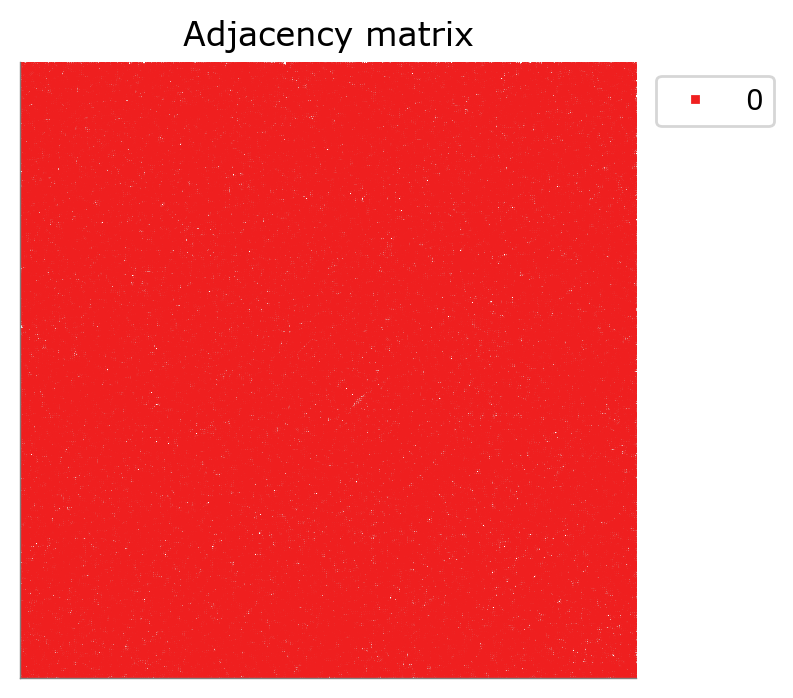

In [8]:
fig = plt.figure(figsize=(4, 4))
widths = [4]
heights = [4]
spec5 = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
c = gen_colors(start=colors_red[0], end=colors_blue[0], n=3)
_, indexes, counts = np.unique(subGroupId, return_index=True, return_counts=True)
counts = counts[np.argsort(indexes)]
plot_block_matrix(subA.toarray(), partition_names=list(range(3)), partition_counts=counts, colors=c, ms=0.01)

# Confusion Matrix Of Subgraph For n=12000, Z_s=1,Z_b=2, d=50, delta=0.01. Different rho

In [100]:
n_q = 4000
d = 50
Z_s = 1
Z_b = 2
q = Z_s + Z_b
n = q * n_q
min_delta, max_delta = get_range_delta(d, n, q)
rhos = np.setdiff1d(np.around(np.linspace(0, 1, 51), 2), np.array([0, 1]))
deltas = np.setdiff1d(np.around(np.linspace(min_delta, max_delta, int((max_delta - min_delta) / 0.0005) + 1), 5),np.array([0]))
print(f'rhos={rhos}\n deltas={deltas}')

rhos=[0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26 0.28
 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54 0.56
 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82 0.84
 0.86 0.88 0.9  0.92 0.94 0.96 0.98]
 deltas=[-0.00625 -0.00574 -0.00524 -0.00473 -0.00422 -0.00372 -0.00321 -0.0027
 -0.0022  -0.00169 -0.00118 -0.00068 -0.00017  0.00034  0.00084  0.00135
  0.00186  0.00236  0.00287  0.00338  0.00389  0.00439  0.0049   0.00541
  0.00591  0.00642  0.00693  0.00743  0.00794  0.00845  0.00895  0.00946
  0.00997  0.01047  0.01098  0.01149  0.01199  0.0125 ]


In [98]:
def cm_for_network(delta, rho, n, n_q, d, Z_s, Z_b):
#     delta = 0.005
#     rho = 0.1
    pin = d / n + delta * (1 - 1 / q)
    pout = d / n - delta / q
    pin = 0 if pin < 1e-10 else pin
    pout = 0 if pout < 1e-10 else pout
    ps = (pin - pout) * np.identity(q) + pout * np.ones((q, q))
    sizes = [[n_q] * Z_s, [n_q] * Z_b]
    msbm = MetaSBM(n, rho, ps, sizes)
    A = msbm.sample()
    subA, subGroupId = msbm.filter(A, metaId=0)
    subTrueNumgroup = np.size(np.unique(subGroupId))
    subBHpartition, subBHNumgroup = CommunityDetect(subA).BetheHessian()
    print(f'True Sub Group Number is {subTrueNumgroup}')
    print(f'BH Sub Group Number is {subBHNumgroup}')
    confusionMatrix, _ = get_confusionmatrix(subGroupId, subBHpartition, subTrueNumgroup, subBHNumgroup)
    np.set_printoptions(suppress = True)
    print(f'rho is {rho}, AMI is {adjusted_mutual_info_score(subGroupId, subBHpartition)}, Confusion Matrix is\n {confusionMatrix}')
    fig = plt.figure(figsize=(4, 4))
    widths = [4]
    heights = [4]
    spec5 = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths, height_ratios=heights)
    row = 0
    col = 0
    ax = fig.add_subplot(spec5[row, col])
    c = gen_colors(start=colors_red[0], end=colors_blue[0], n=6)
    _, indexes, counts = np.unique(subGroupId, return_index=True, return_counts=True)
    counts = counts[np.argsort(indexes)]
    plot_block_matrix(subA.toarray(), partition_names=list(range(6)), partition_counts=counts, colors=c, ms=0.01)

Metadata generation done!
number of groups = 2
True Sub Group Number is 3
BH Sub Group Number is 2
True index is [1 2], Community detected index is [0 1]
rho is 0.1, AMI is 0.8267566762107238, Confusion Matrix is
 [[ 210.  194.]
 [3596.    5.]
 [   8. 3575.]]


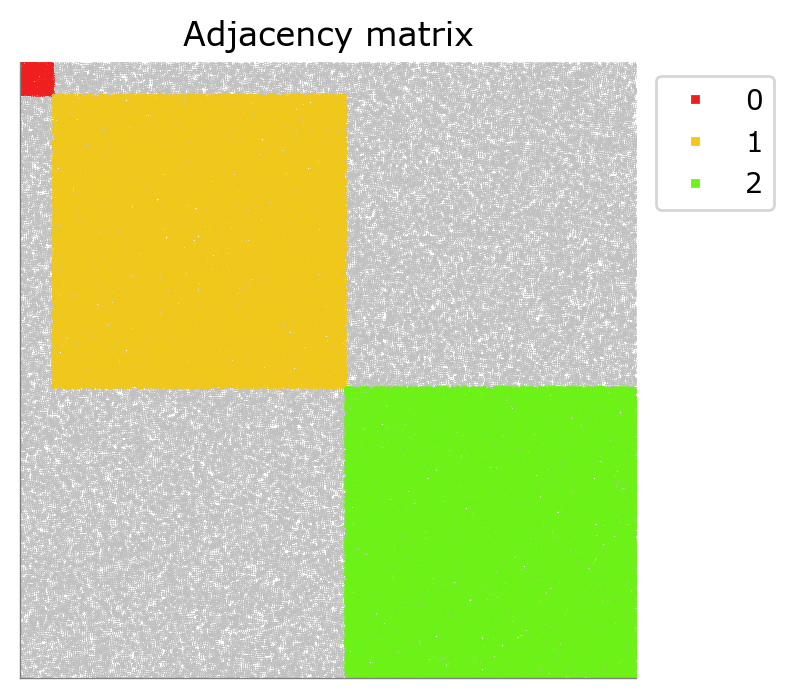

In [99]:
cm_for_network(delta=0.005, rho=0.1, n=n, n_q=n_q, d=d, Z_s=Z_s, Z_b=Z_b)

Metadata generation done!
number of groups = 3
True Sub Group Number is 3
BH Sub Group Number is 3
True index is [0 1 2], Community detected index is [2 1 0]
rho is 0.4, AMI is 0.8460115112758363, Confusion Matrix is
 [[1528.   33.   43.]
 [  52. 2354.   27.]
 [  44.   17. 2345.]]


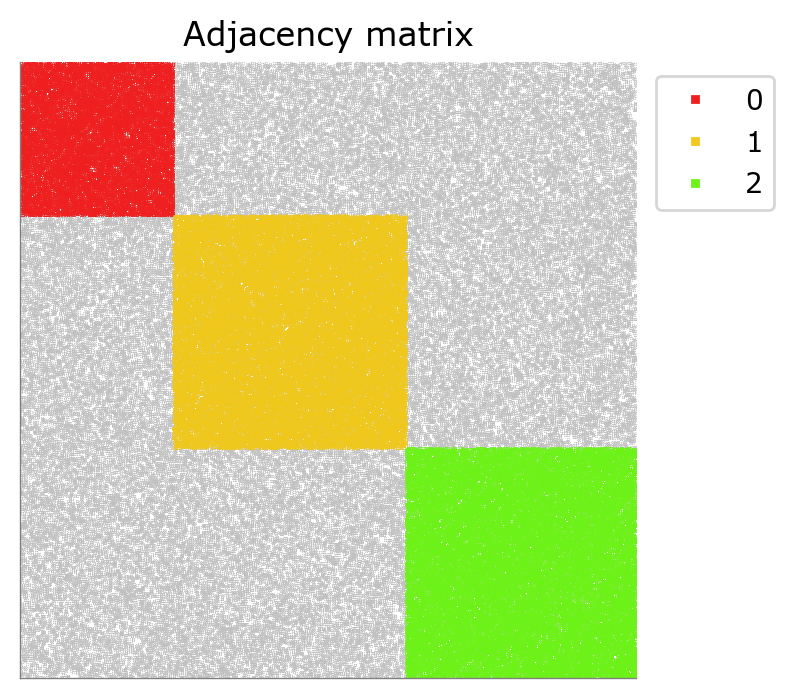

In [101]:
cm_for_network(delta=0.005, rho=0.4, n=n, n_q=n_q, d=d, Z_s=Z_s, Z_b=Z_b)

Metadata generation done!
number of groups = 2
True Sub Group Number is 3
BH Sub Group Number is 2
True index is [0 1], Community detected index is [1 0]
rho is 0.8, AMI is 0.3997089047465386, Confusion Matrix is
 [[2771.  400.]
 [  62.  735.]
 [  97.  707.]]


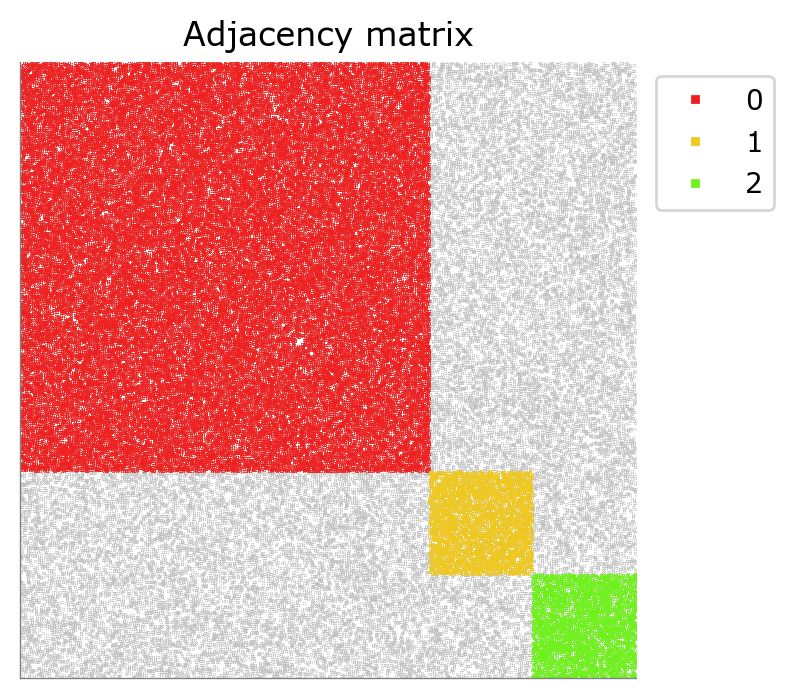

In [102]:
cm_for_network(delta=0.005, rho=0.8, n=n, n_q=n_q, d=d, Z_s=Z_s, Z_b=Z_b)

Metadata generation done!
number of groups = 2
True Sub Group Number is 3
BH Sub Group Number is 2
True index is [1 2], Community detected index is [1 0]
rho is 0.1, AMI is 0.7941389513782887, Confusion Matrix is
 [[ 195.  188.]
 [3582.   33.]
 [  22. 3582.]]


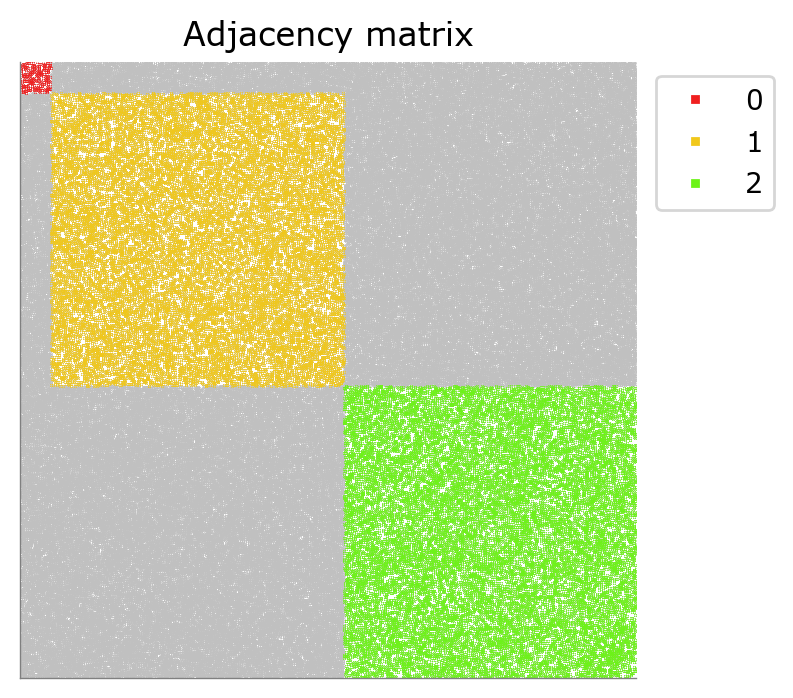

In [103]:
cm_for_network(delta=-0.0035, rho=0.1, n=n, n_q=n_q, d=d, Z_s=Z_s, Z_b=Z_b)

Metadata generation done!
number of groups = 3
True Sub Group Number is 3
BH Sub Group Number is 3
True index is [0 1 2], Community detected index is [0 2 1]
rho is 0.4, AMI is 0.42439837099993993, Confusion Matrix is
 [[1091.  248.  201.]
 [ 370. 1971.   77.]
 [ 408.   74. 1879.]]


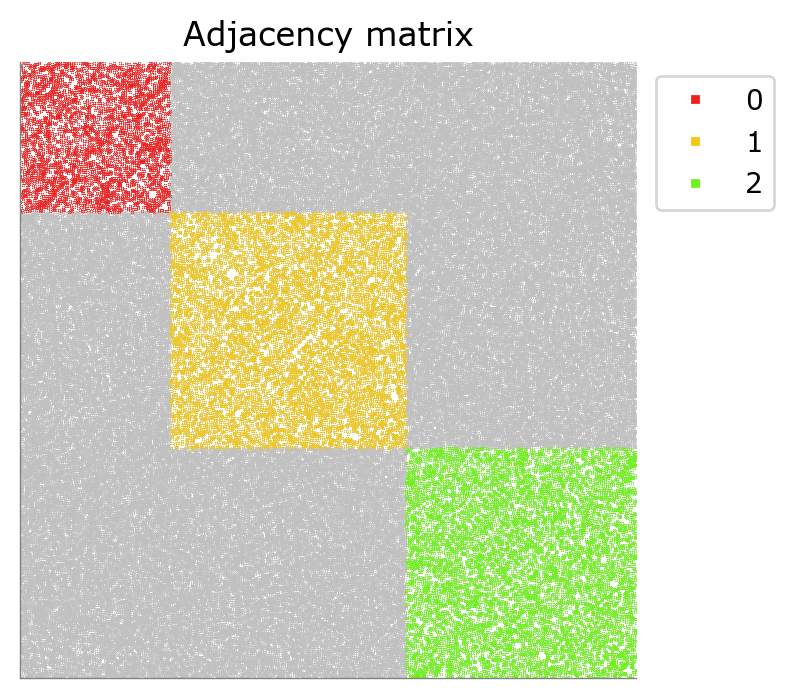

In [104]:
cm_for_network(delta=-0.0035, rho=0.4, n=n, n_q=n_q, d=d, Z_s=Z_s, Z_b=Z_b)

Metadata generation done!
number of groups = 2
True Sub Group Number is 3
BH Sub Group Number is 2
True index is [0 1], Community detected index is [0 1]
rho is 0.8, AMI is 0.3710161396597156, Confusion Matrix is
 [[2730.  448.]
 [  69.  689.]
 [  91.  662.]]


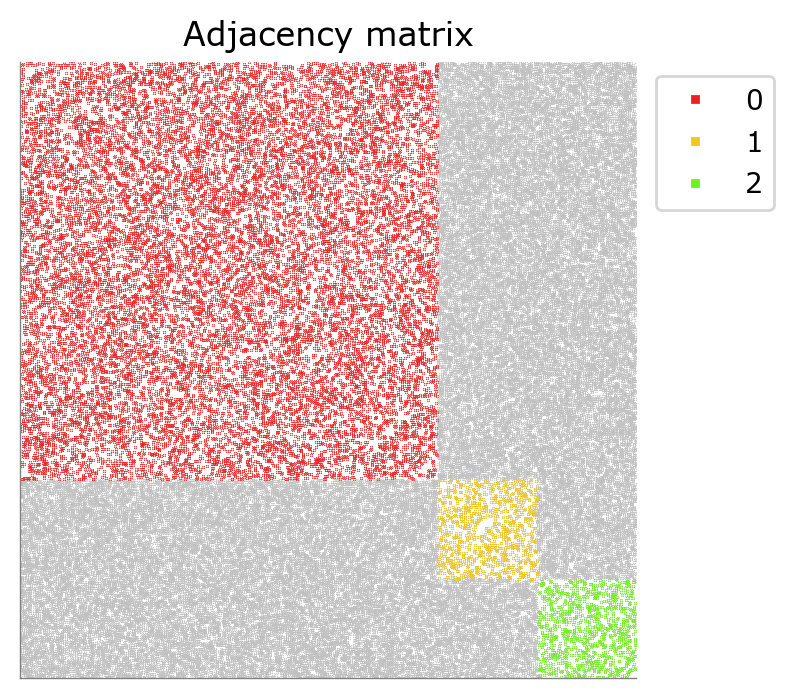

In [105]:
cm_for_network(delta=-0.0035, rho=0.8, n=n, n_q=n_q, d=d, Z_s=Z_s, Z_b=Z_b)

# AMISNR imshow

In [64]:
# For big n
n_q = 4000
q = 3
n = q * n_q
d = 50
Z_s = 1
Z_b = 2
Withlambda = True
givenNumGroup = False
DC = False
BP = False
fileID = 'amiExp12.28' + f'_n={n}_q={q}_d={round(d)}_{"lambda" if Withlambda else ""}_' \
                            f'{"givenNumGroup" if givenNumGroup else ""}_' \
                            f'{"DC" if DC else ""}'
load_path = "./result/detectabilityWithMeta/" + fileID + ".txt"
plot_rhos, plot_zs, sub_ami, sub_num_group, lambdas = read_exp(load_path=load_path, Withlambda=Withlambda, exclude_rho=[0, 1])
print("This lambdas is wrong!!!")

3


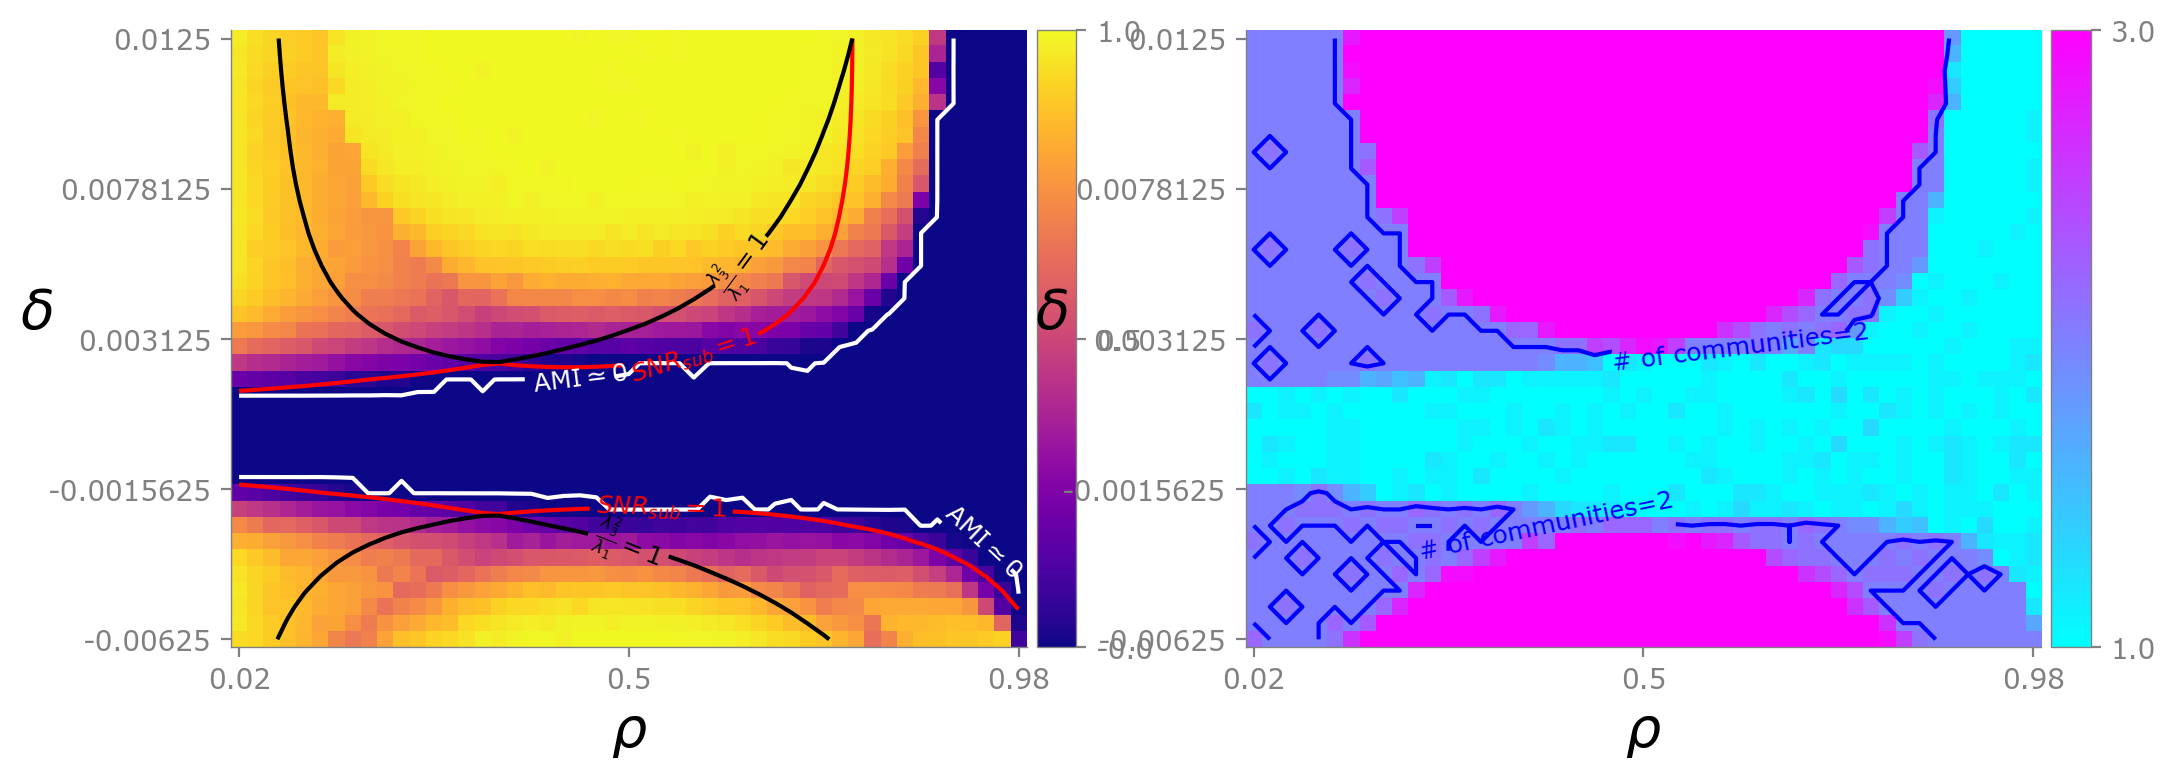

In [80]:
fig = plt.figure(figsize=(12, 6))
widths = [6, 6]
heights = [6]
spec5 = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
zcenter = 0.5
plot_subami = color_imshow_2d(plot_rhos, plot_zs, sub_ami, z_center=zcenter, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap, ax=ax, fig=fig)
# remove two side contour
# plot_subami[20:, 45:]=0.5
# plot_subami[20:, :5]=0.5
# plot_subami[:2, 45:]=0.5
# plot_subami[:2, :5]=0.5
# amiupper = 0.999
# contour_data(plot_subami, ax, levels=[amiupper], fmt={amiupper: rf'AMI$\simeq$1'}, color='blue')
# amimid =0.9
# contour_data(plot_subami, ax, levels=[amimid], fmt={amimid: rf'AMI$\simeq${amimid}'}, color='blue')
# # amimid1 = 0.81
# # contour_data(plot_subami, ax, levels=[amimid1], fmt={amimid1: rf'AMI$\simeq${amimid1}'}, color='blue')
contour_data(plot_subami, ax, levels=[1e-3], fmt={1e-3: r'AMI$\simeq$0'}, color='white')
plot_snrm = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**2/lambdas[:, 0], z_center=1, return_gridz=True)
# plot_ch_exact = color_imshow_2d(plot_rhos, plot_zs, CH_m_exact, z_center=1, return_gridz=True)
plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 3]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**2/lambdas[:, 0], z_center=1, return_gridz=True)
contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR_{sub}=1$'}, color='red')
# contour_data(plot_ch_exact, ax, levels=[1], fmt={1: r'$CH=1$'}, color='red')
contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green')
contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black')
# # save_path = "./_Figure/" + fileId + "_noGivenNumGroup" + "_subami_exact" + ".pdf"
# plt.tight_layout()
# plt.savefig(save_path, dpi=600)
row = 0
col = 1
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["cool"]
plot_subnumgroup = color_imshow_2d(plot_rhos, plot_zs, sub_num_group, z_center=4, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap, ax=ax, fig=fig, vmax=3)
nummid = 2
contour_data(plot_subnumgroup, ax, levels=[nummid], fmt={nummid: rf'# of communities={nummid}'}, color='blue')

In [91]:
Lambda4 = np.zeros(np.size(delta)*np.size(rho))
Lambda3 = np.zeros(np.size(delta)*np.size(rho))
Lambda2 = np.zeros(np.size(delta)*np.size(rho))
Lambda1 = np.zeros(np.size(delta)*np.size(rho))
i = 0
for _rho in rho:
    for _delta in delta:
        pin = d / n + _delta * (1 - 1 / q)
        pout = d / n - _delta / q
        pin = 0 if pin < 1e-10 else pin
        pout = 0 if pout < 1e-10 else pout
        
        average_n_sub = Z_s * n_q * _rho + Z_b * n_q * (1 - _rho)
        rho_in_sub = Z_s * _rho / (Z_s * _rho + Z_b * (1 - _rho))
        epsilon = rho_in_sub / Z_s - (1-rho_in_sub) / Z_b
#         average_n_sub = 100000
#         lambdas = MetaSBM.get_lambdas(average_n_sub, _rho, Z_s=Z_s, Z_b=Z_b, pin=pin, pout=pout)
        lambda1 = (average_n_sub / 2) * ((rho_in_sub / Z_s + (1 - rho_in_sub) / Z_b) * _delta + pout +
                             np.sqrt((epsilon * _delta + pout) ** 2 + 4 * (rho_in_sub - 1) * epsilon * _delta * pout))
        lambda2 = average_n_sub * rho_in_sub / Z_s * _delta
        lambda3 = (average_n_sub / 2) * ((rho_in_sub / Z_s + (1 - rho_in_sub) / Z_b) * _delta + pout -
                             np.sqrt((epsilon * _delta + pout) ** 2 + 4 * (rho_in_sub - 1) * epsilon * _delta * pout))
        lambda4 = average_n_sub * (1 - rho_in_sub) / Z_b * _delta
#         if lambdas[0] == 0:
#             print(_rho, _delta, pin, pout, lambdas)
#         Lambda1[i] = lambdas[0]
#         Lambda2[i] = lambdas[1]
#         Lambda3[i] = lambdas[2] if len(lambdas) > 2 else 0
#         Lambda4[i] = lambdas[3] if len(lambdas) > 3 else 0
#         print(lambda1)
        if rho_in_sub >= Z_s / (Z_s + Z_b):
            Lambda1[i] = lambda1
            Lambda2[i] = lambda3
            Lambda3[i] = lambda4
            Lambda4[i] = 0
        else:
            Lambda1[i] = lambda1
            Lambda2[i] = lambda4
            Lambda3[i] = lambda3
            Lambda4[i] = 0
        i += 1

3


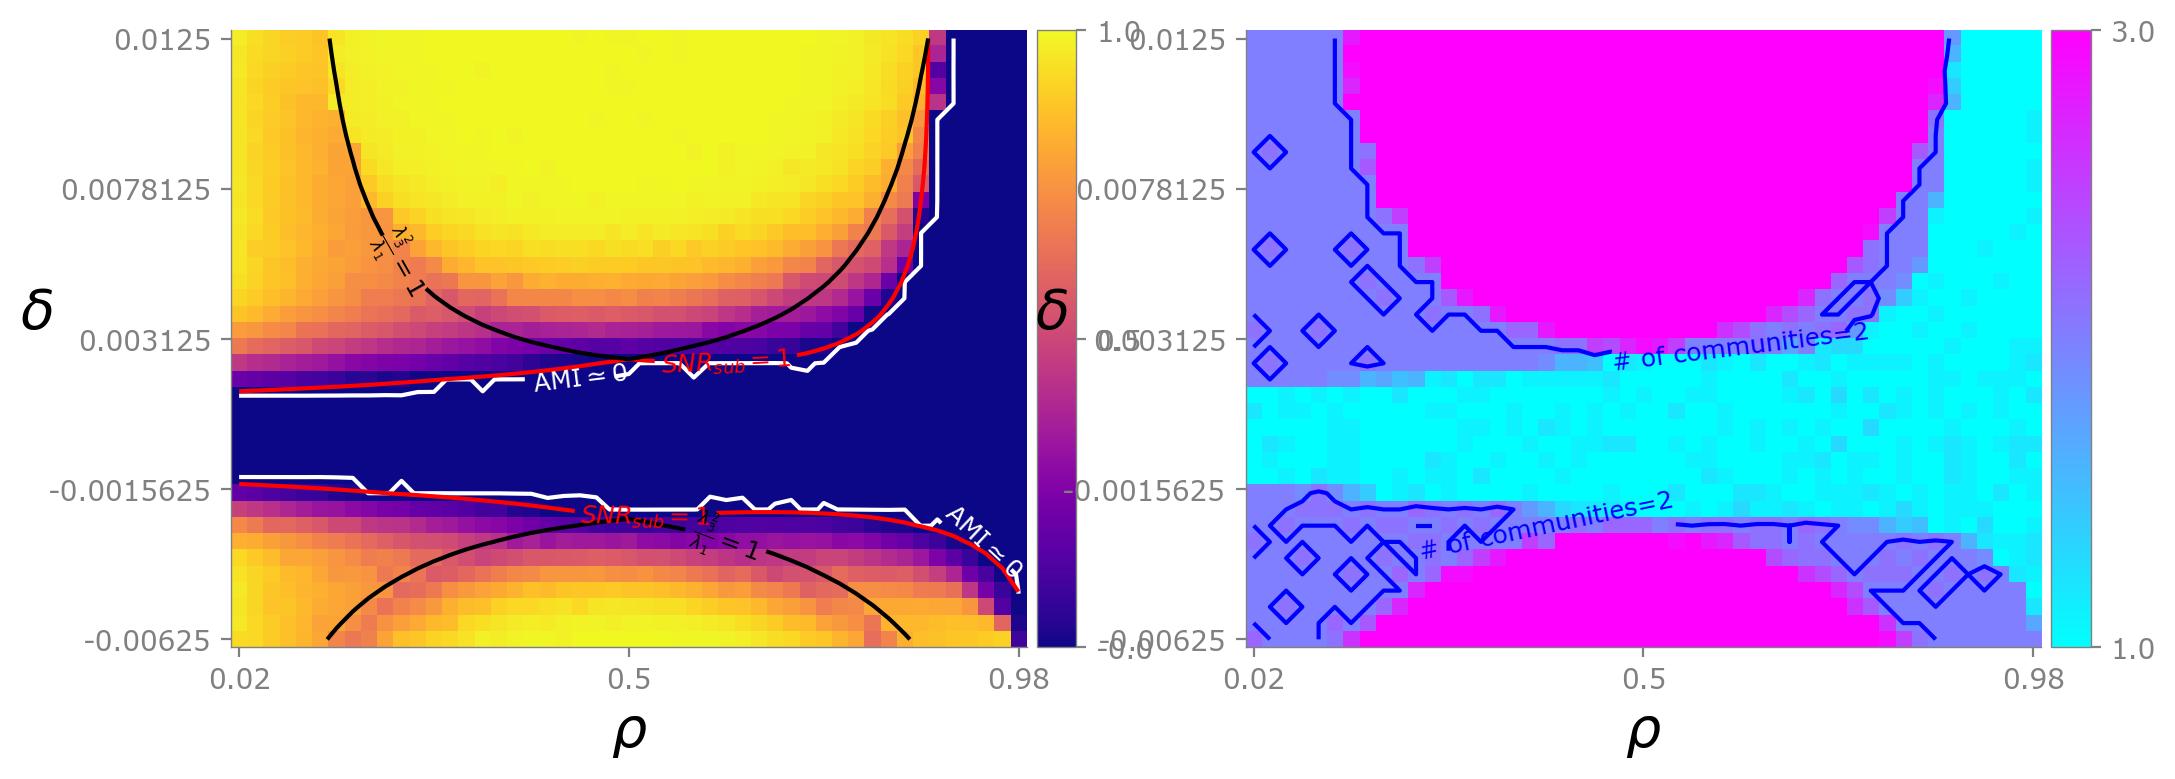

In [92]:
fig = plt.figure(figsize=(12, 6))
widths = [6, 6]
heights = [6]
spec5 = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
zcenter = 0.5
plot_subami = color_imshow_2d(plot_rhos, plot_zs, sub_ami, z_center=zcenter, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap, ax=ax, fig=fig)
# remove two side contour
# plot_subami[20:, 45:]=0.5
# plot_subami[20:, :5]=0.5
# plot_subami[:2, 45:]=0.5
# plot_subami[:2, :5]=0.5
# amiupper = 0.999
# contour_data(plot_subami, ax, levels=[amiupper], fmt={amiupper: rf'AMI$\simeq$1'}, color='blue')
# amimid =0.9
# contour_data(plot_subami, ax, levels=[amimid], fmt={amimid: rf'AMI$\simeq${amimid}'}, color='blue')
# # amimid1 = 0.81
# # contour_data(plot_subami, ax, levels=[amimid1], fmt={amimid1: rf'AMI$\simeq${amimid1}'}, color='blue')
contour_data(plot_subami, ax, levels=[1e-3], fmt={1e-3: r'AMI$\simeq$0'}, color='white')
plot_snrm = color_imshow_2d(plot_rhos, plot_zs, Lambda2**2/Lambda1, z_center=1, return_gridz=True)
# plot_ch_exact = color_imshow_2d(plot_rhos, plot_zs, CH_m_exact, z_center=1, return_gridz=True)
plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, Lambda4**2/Lambda1, z_center=1, return_gridz=True)
plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, Lambda3**2/Lambda1, z_center=1, return_gridz=True)
contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR_{sub}=1$'}, color='red')
# contour_data(plot_ch_exact, ax, levels=[1], fmt={1: r'$CH=1$'}, color='red')
contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green')
contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black')
# # save_path = "./_Figure/" + fileId + "_noGivenNumGroup" + "_subami_exact" + ".pdf"
# plt.tight_layout()
# plt.savefig(save_path, dpi=600)
row = 0
col = 1
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["cool"]
plot_subnumgroup = color_imshow_2d(plot_rhos, plot_zs, sub_num_group, z_center=4, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap, ax=ax, fig=fig, vmax=3)
nummid = 2
contour_data(plot_subnumgroup, ax, levels=[nummid], fmt={nummid: rf'# of communities={nummid}'}, color='blue')

In [58]:
rho=0.84
delta=0.008
pin = d / n + delta * (1 - 1 / q)
pout = d / n - delta / q
pin = 0 if pin < 1e-10 else pin
pout = 0 if pout < 1e-10 else pout
ps = (pin - pout) * np.identity(q) + pout * np.ones((q, q))
sizes = [[n_q] * Z_s, [n_q] * Z_b]
# sizes.append([n_q] * Z_s) if rho != 0 else None
# sizes.append([n_q] * Z_b) if rho != 1 else None
msbm = MetaSBM(n, rho, ps, sizes)

A = msbm.sample()
metaIdSelect = 0
filterA, filterGroupId = msbm.filter(A, metaId=metaIdSelect)
subpartition, sub_num_groups = CommunityDetect(filterA).BetheHessian()
sub_ami = adjusted_mutual_info_score(filterGroupId, subpartition)
average_n_sub = Z_s * n_q * rho + Z_b * n_q * (1 - rho)
lambdas = MetaSBM.get_lambdas(average_n_sub, rho, Z_s=Z_s, Z_b=Z_b, pin=pin, pout=pout)
print(f'SNR = {lambdas[1]**2 / lambdas[0]}')
print(f'AMI = {sub_ami}')

Metadata generation done!
number of groups = 2
SNR = 0.4058387251794028
AMI = 0.7333544655338063


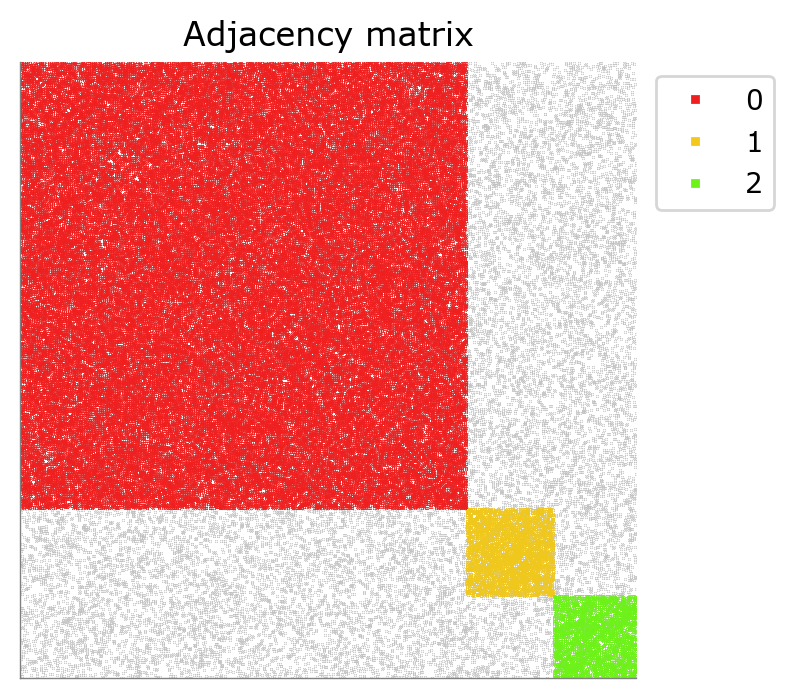

In [33]:
fig = plt.figure(figsize=(4, 4))
widths = [4]
heights = [4]
spec5 = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
c = gen_colors(start=colors_red[0], end=colors_blue[0], n=6)
_, indexes, counts = np.unique(filterGroupId, return_index=True, return_counts=True)
counts = counts[np.argsort(indexes)]
plot_block_matrix(filterA.toarray(), partition_names=list(range(6)), partition_counts=counts, colors=c, ms=0.01)

In [39]:
print(f'{average_n_sub, np.shape(filterA)}')
print(f'pin={pin}, pout={pout}')

(4640.0, (4673, 4673))
pin=0.009500000000000001, pout=0.0015


In [62]:
epsilon = rho / Z_s - (1-rho) / Z_b
lambda1 = ((rho / Z_s + (1-rho) / Z_b) * delta + pout + np.sqrt((epsilon * delta + pout)**2 + 4*(rho - 1)*epsilon*delta*pout)) / 2
lambda2 = ((rho / Z_s + (1-rho) / Z_b) * delta + pout - np.sqrt((epsilon * delta + pout)**2 + 4*(rho - 1)*epsilon*delta*pout)) / 2
31.180**2 / (average_n_sub * lambda1)

26.117597659153677

In [106]:
rhos = np.setdiff1d(np.around(np.linspace(0, 1, 51), 2), np.array([0, 1]))
print(rhos)
rho_in_sub = Z_s * rhos / (Z_s * rhos + Z_b * (1 - rhos))
print(rho_in_sub)

[0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26 0.28
 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54 0.56
 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82 0.84
 0.86 0.88 0.9  0.92 0.94 0.96 0.98]
[0.01010101 0.02040816 0.03092784 0.04166667 0.05263158 0.06382979
 0.07526882 0.08695652 0.0989011  0.11111111 0.12359551 0.13636364
 0.14942529 0.1627907  0.17647059 0.19047619 0.20481928 0.2195122
 0.2345679  0.25       0.26582278 0.28205128 0.2987013  0.31578947
 0.33333333 0.35135135 0.36986301 0.38888889 0.4084507  0.42857143
 0.44927536 0.47058824 0.49253731 0.51515152 0.53846154 0.5625
 0.58730159 0.61290323 0.63934426 0.66666667 0.69491525 0.72413793
 0.75438596 0.78571429 0.81818182 0.85185185 0.88679245 0.92307692
 0.96078431]


## fix rho

In [26]:
def get_range_delta(d, n, q):
    if 0 < d < n / (q):
        min_delta = q * d / ((1 - q) * n)
        max_delta = q * d / n
    elif n / (q) <= d < (1 - 1 / (q)) * n:
        min_delta = q * d / ((1 - q) * n)
        max_delta = (q / (1 - q)) * (d / n - 1)
    elif (1 - 1 / (q)) * n <= d < n:
        min_delta = q * (d / n - 1)
        max_delta = (q / (1 - q)) * (d / n - 1)
    else:
        min_delta, max_delta = None, None
    return min_delta, max_delta

In [23]:
# For big n
n_q = 4000
q = 3
n = q * n_q
d = 50
Z_s = 1
Z_b = 2
Withlambda = True
givenNumGroup = False
DC = False
BP = False
fileID = 'amiExp12.28' + f'_n={n}_q={q}_d={round(d)}_{"lambda" if Withlambda else ""}_' \
                            f'{"givenNumGroup" if givenNumGroup else ""}_' \
                            f'{"DC" if DC else ""}onlymodifyrho'
load_path = "./result/detectabilityWithMeta/" + fileID + ".txt"
plot_rhos, plot_zs, sub_ami, sub_num_group, lambdas = read_exp(load_path=load_path, Withlambda=Withlambda, exclude_rho=[0, 1])
print("This lambdas is wrong!!!")

This lambdas is wrong!!!


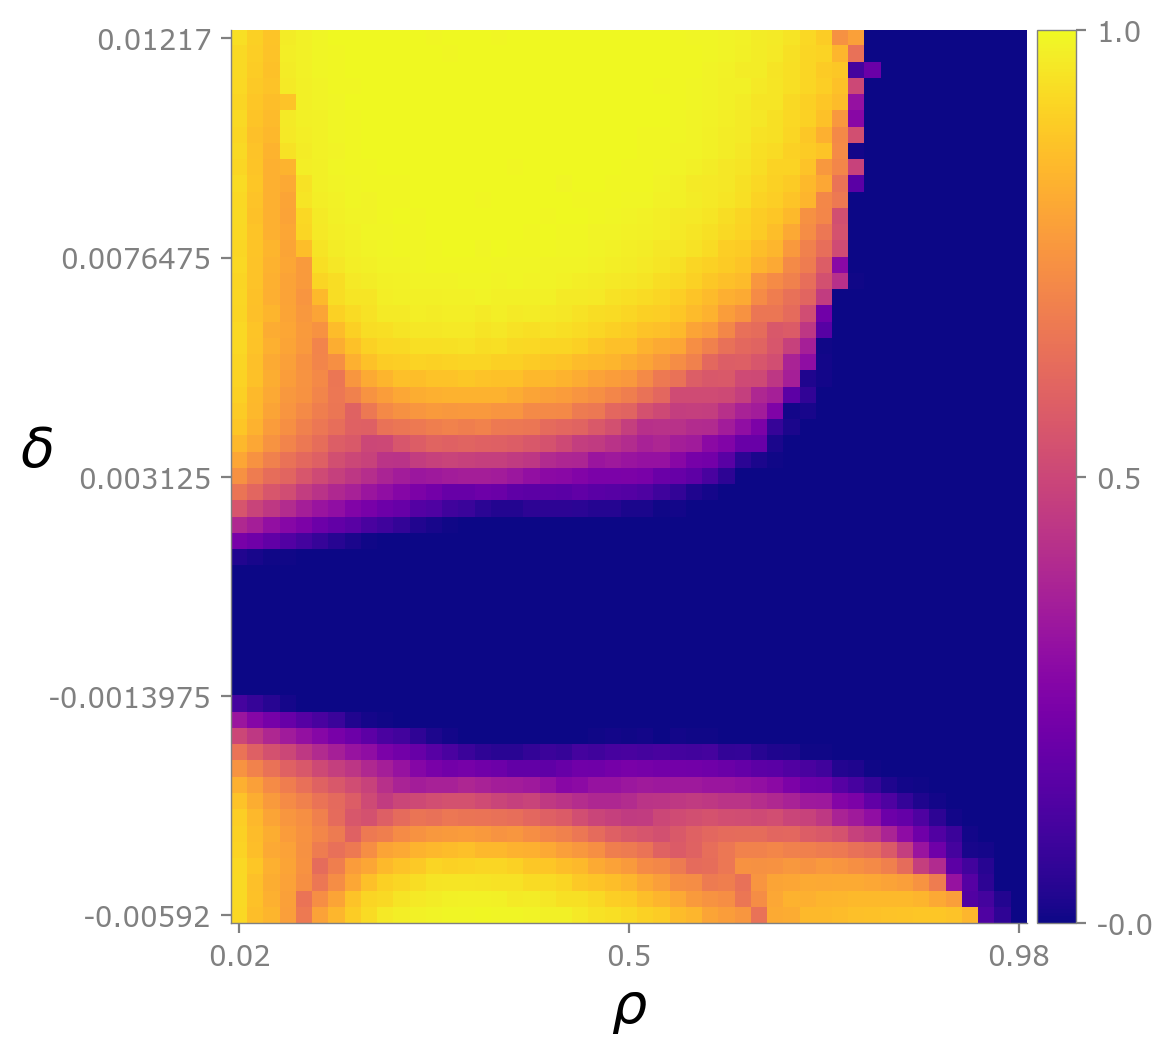

In [24]:
fig = plt.figure(figsize=(12, 6))
widths = [6, 6]
heights = [6]
spec5 = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
zcenter = 0.5
plot_subami = color_imshow_2d(plot_rhos, plot_zs, sub_ami, z_center=zcenter, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap, ax=ax, fig=fig)


In [33]:
rho = np.setdiff1d(np.around(np.linspace(0, 1, 51), 2), np.array([0, 1]))
# min_delta, max_delta = get_range_delta(d, n, q)
# delta = np.setdiff1d(np.around(np.linspace(min_delta, max_delta, int(58)), 5), np.array([0]))
delta = np.unique(plot_zs)
Lambda4 = np.zeros(np.size(delta)*np.size(rho))
Lambda3 = np.zeros(np.size(delta)*np.size(rho))
Lambda2 = np.zeros(np.size(delta)*np.size(rho))
Lambda1 = np.zeros(np.size(delta)*np.size(rho))
i = 0
for _rho in rho:
    for _delta in delta:
        pin = d / n + _delta * (1 - 1 / q)
        pout = d / n - _delta / q
        pin = 0 if pin < 1e-10 else pin
        pout = 0 if pout < 1e-10 else pout
        
        rho_f = Z_b * _rho / (Z_b * _rho + Z_s * (1 - _rho))
        rho_in_sub = _rho
        average_n_sub = Z_s * n_q * rho_f + Z_b * n_q * (1 - rho_f)
        
        epsilon = rho_in_sub / Z_s - (1-rho_in_sub) / Z_b

        lambda1 = (average_n_sub / 2) * ((rho_in_sub / Z_s + (1 - rho_in_sub) / Z_b) * _delta + pout +
                             np.sqrt((epsilon * _delta + pout) ** 2 + 4 * (rho_in_sub - 1) * epsilon * _delta * pout))
        lambda2 = average_n_sub * rho_in_sub / Z_s * _delta
        lambda3 = (average_n_sub / 2) * ((rho_in_sub / Z_s + (1 - rho_in_sub) / Z_b) * _delta + pout -
                             np.sqrt((epsilon * _delta + pout) ** 2 + 4 * (rho_in_sub - 1) * epsilon * _delta * pout))
        lambda4 = average_n_sub * (1 - rho_in_sub) / Z_b * _delta

        if rho_in_sub >= Z_s / (Z_s + Z_b):
            Lambda1[i] = lambda1
            Lambda2[i] = lambda3
            Lambda3[i] = lambda4
            Lambda4[i] = 0
        else:
            Lambda1[i] = lambda1
            Lambda2[i] = lambda4
            Lambda3[i] = lambda3
            Lambda4[i] = 0
        i += 1

3


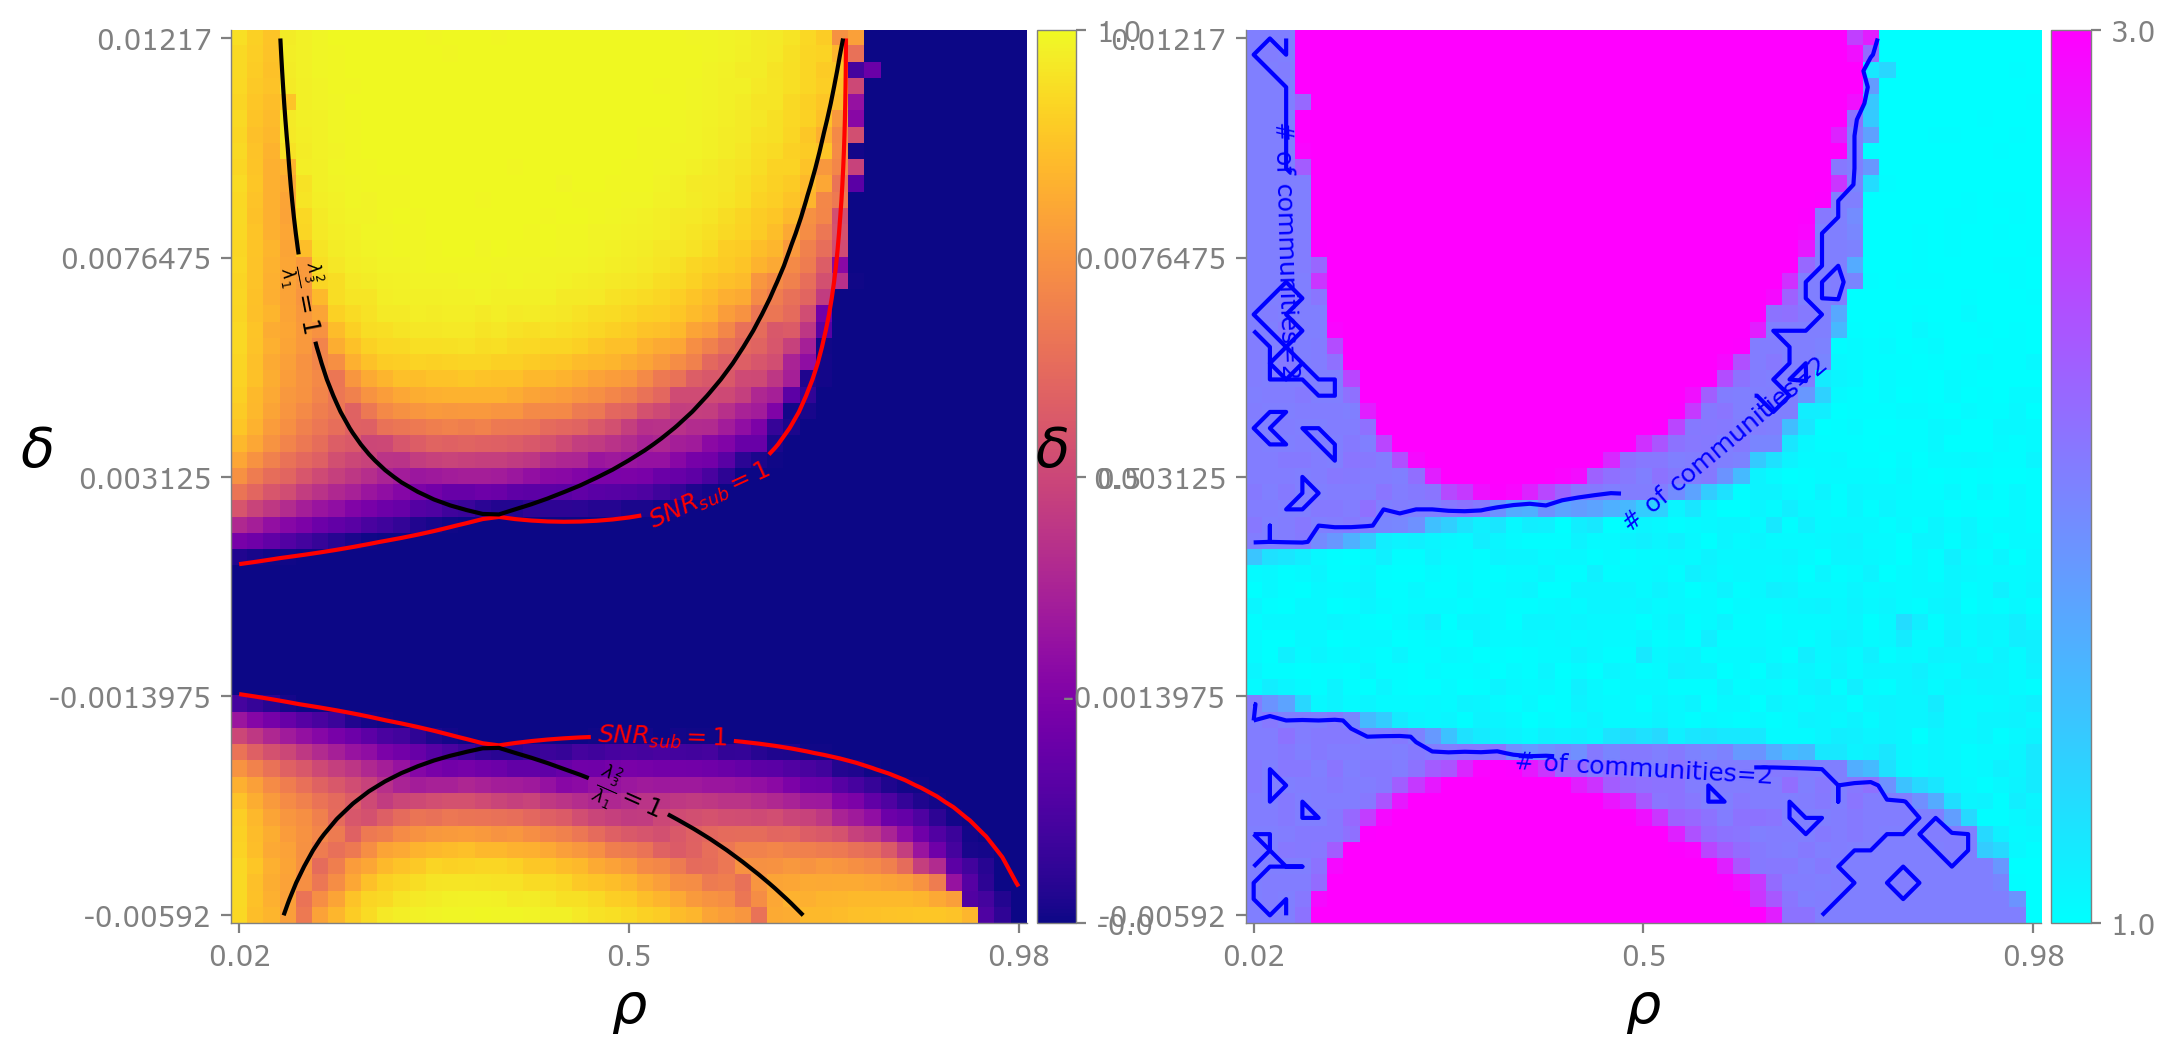

In [34]:
fig = plt.figure(figsize=(12, 6))
widths = [6, 6]
heights = [6]
spec5 = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
zcenter = 0.5
plot_subami = color_imshow_2d(plot_rhos, plot_zs, sub_ami, z_center=zcenter, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap, ax=ax, fig=fig)

# contour_data(plot_subami, ax, levels=[1e-3], fmt={1e-3: r'AMI$\simeq$0'}, color='white')
plot_snrm = color_imshow_2d(plot_rhos, plot_zs, Lambda2**2/Lambda1, z_center=1, return_gridz=True)
plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, Lambda4**2/Lambda1, z_center=1, return_gridz=True)
plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, Lambda3**2/Lambda1, z_center=1, return_gridz=True)
contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR_{sub}=1$'}, color='red')
# contour_data(plot_ch_exact, ax, levels=[1], fmt={1: r'$CH=1$'}, color='red')
# contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green')
contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black')
# # save_path = "./_Figure/" + fileId + "_noGivenNumGroup" + "_subami_exact" + ".pdf"
# plt.tight_layout()
# plt.savefig(save_path, dpi=600)
row = 0
col = 1
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["cool"]
plot_subnumgroup = color_imshow_2d(plot_rhos, plot_zs, sub_num_group, z_center=4, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap, ax=ax, fig=fig, vmax=3)
nummid = 2
contour_data(plot_subnumgroup, ax, levels=[nummid], fmt={nummid: rf'# of communities={nummid}'}, color='blue')

In [32]:
print(plot_rhos, np.shape(plot_rhos))
print(plot_zs, np.shape(np.unique(plot_zs)))
print(np.shape(Lambda1))

[0.02 0.02 0.02 ... 0.98 0.98 0.98] (2695,)
[-0.00592 -0.00559 -0.00526 ...  0.01151  0.01184  0.01217] (55,)
(2793,)


# Fix n, d of subgraph rho is subgraph

In [5]:
# For big n
n = 6000
d = 50
Z_s = 1
Z_b = 2
q = Z_s + Z_b
Withlambda = True
givenNumGroup = False
DC = False
BP = False
fileID = 'amiExp24.1.9' + f'_n={n}_q={q}_d={round(d)}_{"lambda" if Withlambda else ""}_'\
                              f'{"givenNumGroup" if givenNumGroup else ""}_' \
                              f'{"DC" if DC else ""}_fixsubparameter'
load_path = "./result/detectabilityWithMeta/" + fileID + ".txt"
plot_rhos, plot_zs, sub_ami, sub_num_group, lambdas = read_exp(load_path=load_path, Withlambda=Withlambda, exclude_rho=[0, 1])

3


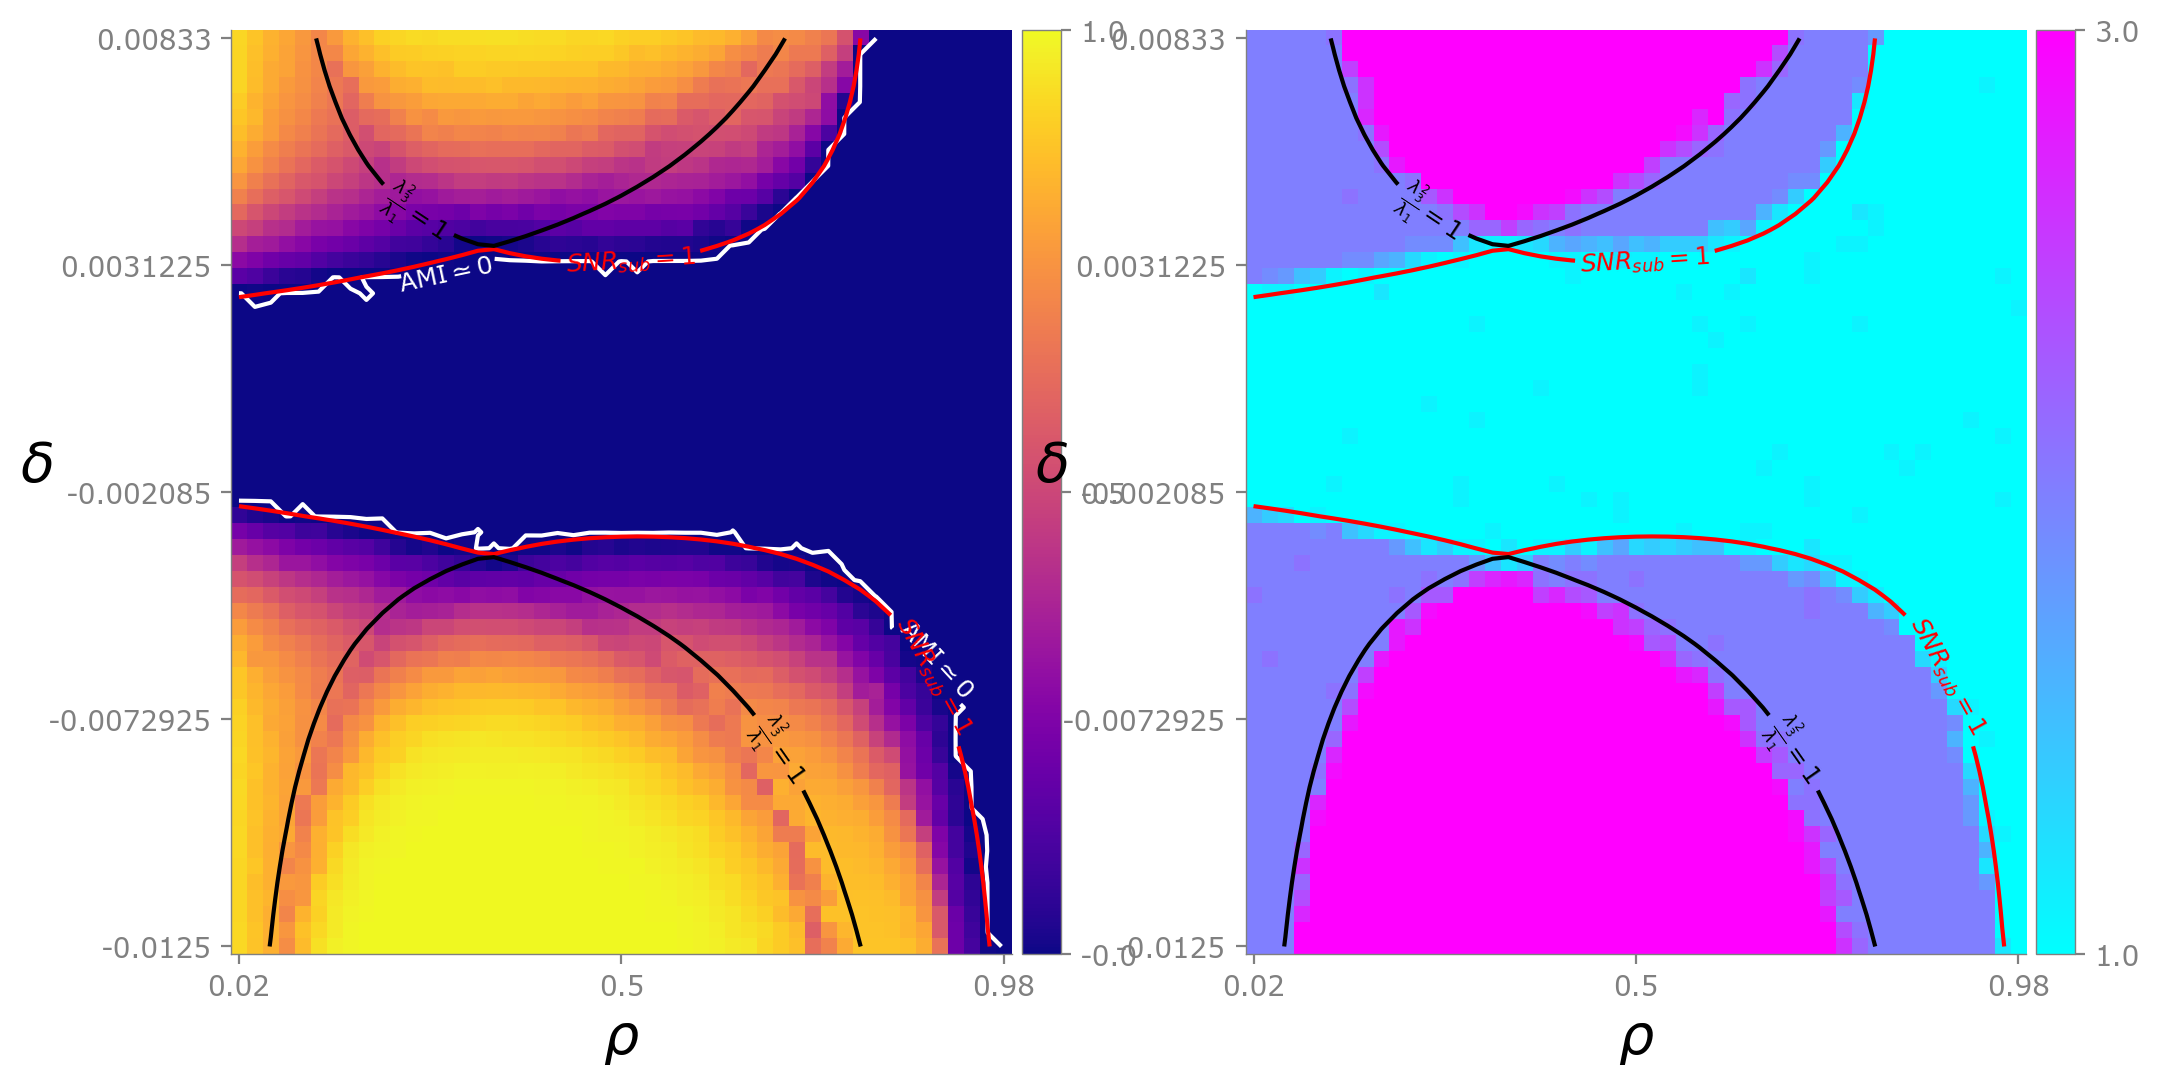

In [8]:
fig = plt.figure(figsize=(12, 6))
widths = [6, 6]
heights = [6]
spec5 = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
zcenter = 0.5
plot_subami = color_imshow_2d(plot_rhos, plot_zs, sub_ami, z_center=zcenter, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap, ax=ax, fig=fig)
# remove two side contour
# plot_subami[20:, 45:]=0.5
# plot_subami[20:, :5]=0.5
# plot_subami[:2, 45:]=0.5
# plot_subami[:2, :5]=0.5
# amiupper = 0.999
# contour_data(plot_subami, ax, levels=[amiupper], fmt={amiupper: rf'AMI$\simeq$1'}, color='blue')
# amimid =0.9
# contour_data(plot_subami, ax, levels=[amimid], fmt={amimid: rf'AMI$\simeq${amimid}'}, color='blue')
# # amimid1 = 0.81
# # contour_data(plot_subami, ax, levels=[amimid1], fmt={amimid1: rf'AMI$\simeq${amimid1}'}, color='blue')
contour_data(plot_subami, ax, levels=[1e-3], fmt={1e-3: r'AMI$\simeq$0'}, color='white')
plot_snrm = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**2/lambdas[:, 0], z_center=1, return_gridz=True)
# plot_ch_exact = color_imshow_2d(plot_rhos, plot_zs, CH_m_exact, z_center=1, return_gridz=True)
plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 3]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**2/lambdas[:, 0], z_center=1, return_gridz=True)
contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR_{sub}=1$'}, color='red')
# contour_data(plot_ch_exact, ax, levels=[1], fmt={1: r'$CH=1$'}, color='red')
contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green')
contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black')
# # save_path = "./_Figure/" + fileId + "_noGivenNumGroup" + "_subami_exact" + ".pdf"
# plt.tight_layout()
# plt.savefig(save_path, dpi=600)
row = 0
col = 1
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["cool"]
plot_subnumgroup = color_imshow_2d(plot_rhos, plot_zs, sub_num_group, z_center=4, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap, ax=ax, fig=fig, vmax=3)
# nummid = 2
# contour_data(plot_subnumgroup, ax, levels=[nummid], fmt={nummid: rf'# of communities={nummid}'}, color='blue')
plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 3]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_snrm = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**2/lambdas[:, 0], z_center=1, return_gridz=True)
contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR_{sub}=1$'}, color='red')
contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green')
contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black')